The KPMG/InsideSherpa Virtual Internship involves three tasks:
    1. Data Quality Assessment
    2. Data Insights 
    3. Data Insight and Presentations
    
### Data Quality Assessment
This stage assesses data quality and completeness in line with KPMG's Standard Data Quality Dimension. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

SprocketTrans = pd.read_excel("C:\\Users\Alaka\Downloads\KPMG_VI_New_raw_data_update_final.xlsx", "Transactions")
SprocketCustDem = pd.read_excel("C:\\Users\Alaka\Downloads\KPMG_VI_New_raw_data_update_final.xlsx", "CustomerDemographic")
SprocketCustAdd = pd.read_excel("C:\\Users\Alaka\Downloads\KPMG_VI_New_raw_data_update_final.xlsx", "CustomerAddress")

A first view of the data sheets provided by Sprocket in MS Excel shows that the header information are not properly set. Columns headers are fixed as below

In [2]:
SprocketTrans.columns = ["transaction_id","product_id","customer_id","transaction_date",
                         "online_order", "order_status", "brand", "product_line", "product_class",
                         "product_size", "list_price", "standard_cost","product_first_sold_date"]

SprocketCustDem.columns = ["customer_id","first_name","last_name","gender",
                           "past_3_years_bike_related_purchases","DOB","job_title",
                           "job_industry_category","wealth_segment","deceased_indicator",
                           "default","owns_car","tenure"]

SprocketCustAdd.columns = ["customer_id", "address", "postcode",
                           "state", "country", "property_valuation"]

In [3]:
SprocketTrans.drop(index = 0, inplace = True)
SprocketCustDem.drop(index = 0, inplace = True)
SprocketCustAdd.drop(index = 0, inplace = True)

In [4]:
SprocketTrans.head(3)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361


Using python conditional statements, I checked for consistency and correctness of data

In [5]:
y = SprocketCustDem.deceased_indicator
for deceased in y:
    if deceased == "Y":
        print(deceased)

Y
Y


In [6]:
z = SprocketCustDem.default
for default in z:
    if default == str(default):
        pass
    else:
        pass

To check for completeness of data, I deployed Python conditional statements and .count() and .notnull() functions. 

In [7]:
SprocketCustDem.count()

customer_id                            4000
first_name                             4000
last_name                              3875
gender                                 4000
past_3_years_bike_related_purchases    4000
DOB                                    3913
job_title                              3494
job_industry_category                  3344
wealth_segment                         4000
deceased_indicator                     4000
default                                3698
owns_car                               4000
tenure                                 3913
dtype: int64

In [8]:
A = SprocketCustDem[SprocketCustDem["job_title"].notnull()]
A.count()

customer_id                            3494
first_name                             3494
last_name                              3385
gender                                 3494
past_3_years_bike_related_purchases    3494
DOB                                    3416
job_title                              3494
job_industry_category                  2943
wealth_segment                         3494
deceased_indicator                     3494
default                                3237
owns_car                               3494
tenure                                 3416
dtype: int64

In [9]:
# this checks if there is any other country asides from Australia
Q = SprocketCustAdd.country
count = 0
for country in Q:
    if country == "Australia":
        count = count + 1
        pass
print(count)

3999


In [10]:
#This conditional is checking for any row without a string type of value. 
R = SprocketCustAdd.state
count = 0
for state in R:
    if state != str(state):
        count = count + 1
        pass
print(count)

0


In [11]:
SprocketCustAdd.count()

customer_id           3999
address               3999
postcode              3999
state                 3999
country               3999
property_valuation    3999
dtype: int64

In [12]:
#This checks for any duplicated value 
U = SprocketTrans.duplicated(subset=None, keep='first')
Y = SprocketCustDem.duplicated(subset=None, keep='first')
T = SprocketCustAdd.duplicated(subset=None, keep='first')

for value in U:
    if value is True:
        print(value)
        
for value in Y:
    if value is True:
        print(value)
        
for value in T:
    if value is True:
        print(value)

At the end of this task, the below is the email I drafted to be sent to the client with a screenshot of the issues I identified in the data. 

"Dear Client

I have reviewed your data to check for consistency, duplicated values, completeness among other criteria. I can confirm to you that your data set is fairly consistent and complete. I deployed Python Panda library in my review and can confirm to you that there are no duplicated rows in any of the three data sets provided by you. 
The table below shows a list of issues I observed in the data set and mitigation strategy to be deployed in fixing the issues. 
I strongly believe if these issues are addressed, the data will be a good fit for analysis/modelling.
The data analytics team working on your data will clean the data and prepare it for analysis. We thank you for your continued interest in working with KPMG.

Warm regards,
Opeyemi Farinde."

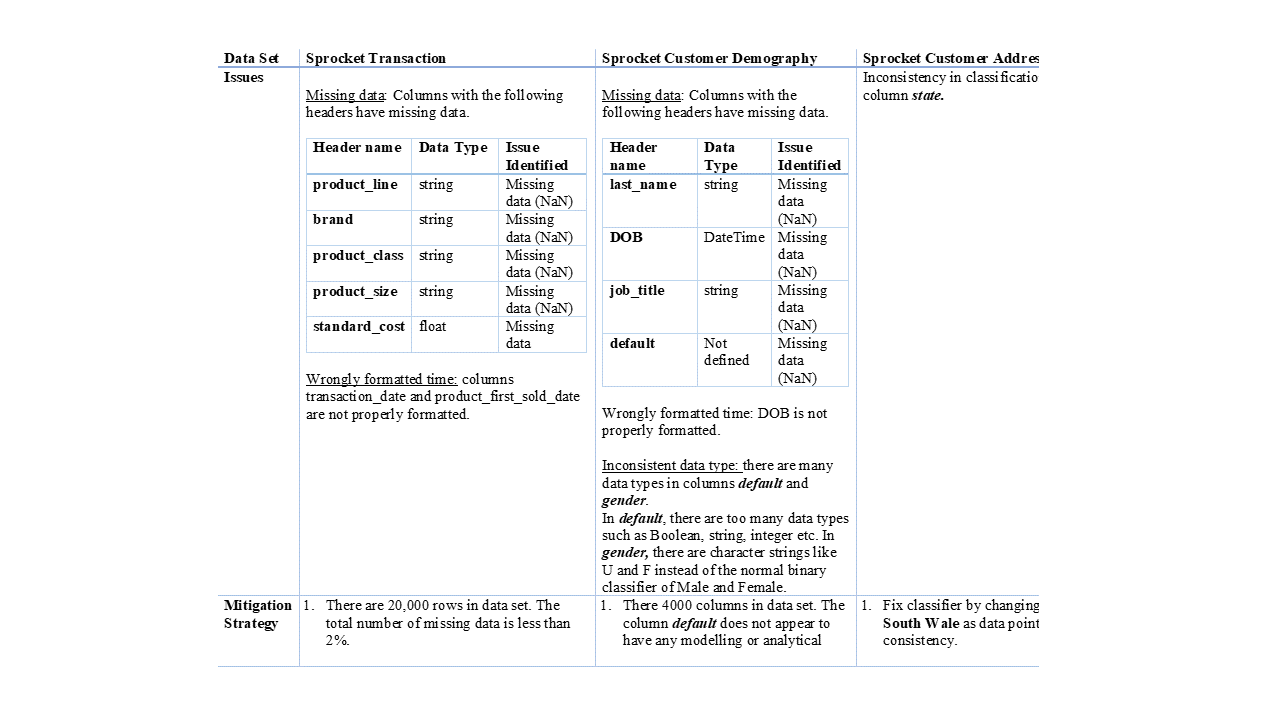

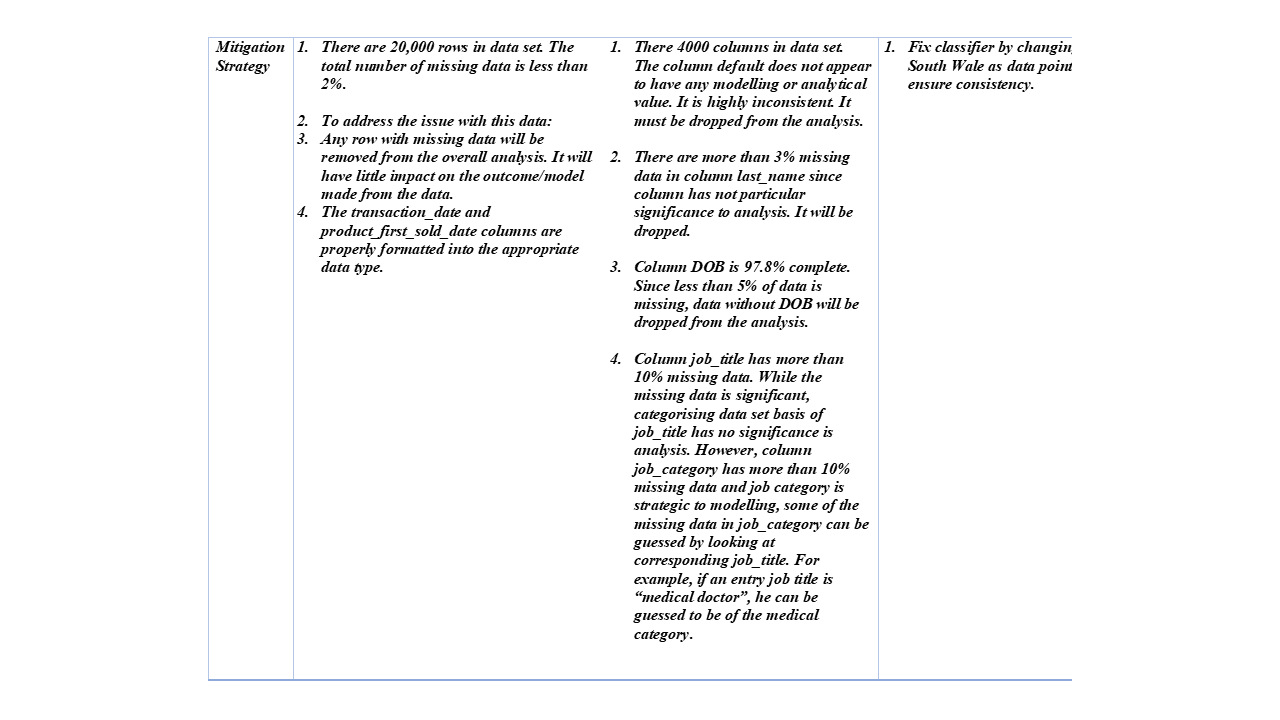

### Data Model Preparation

In this task, a presentation is done to the client to show how data analysis and interpretation will be done. 

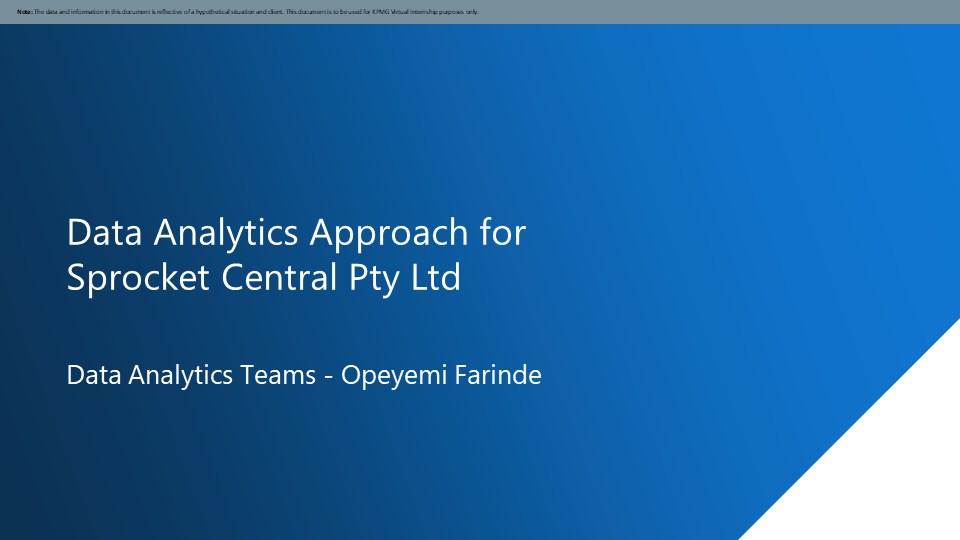
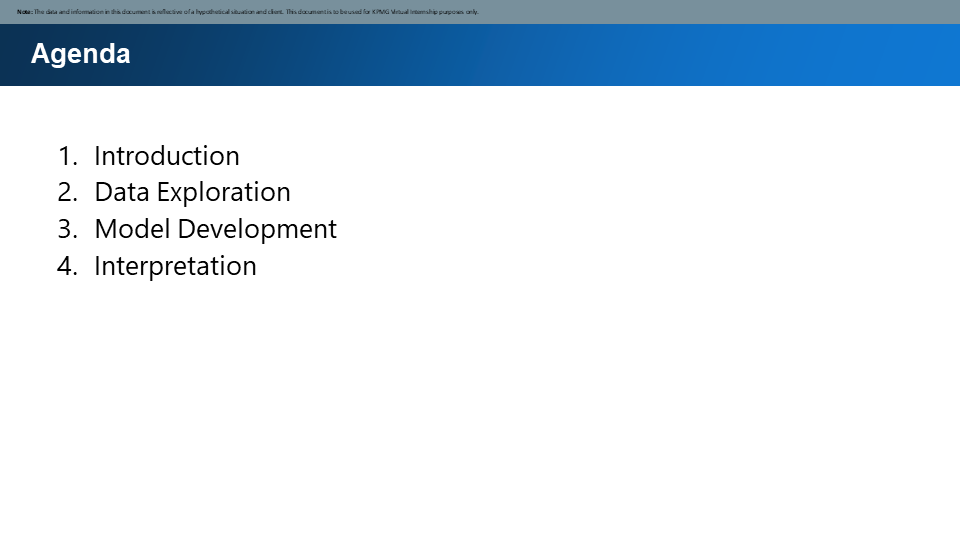
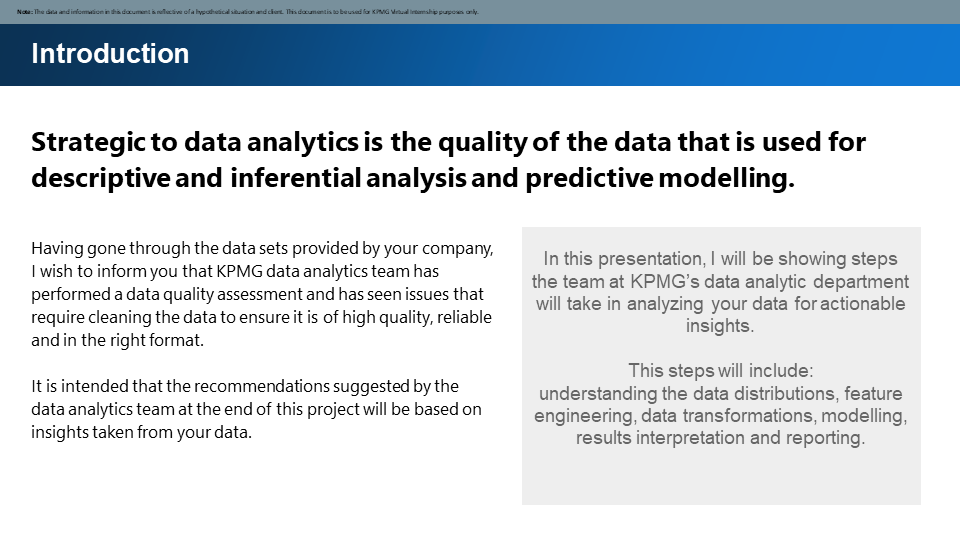
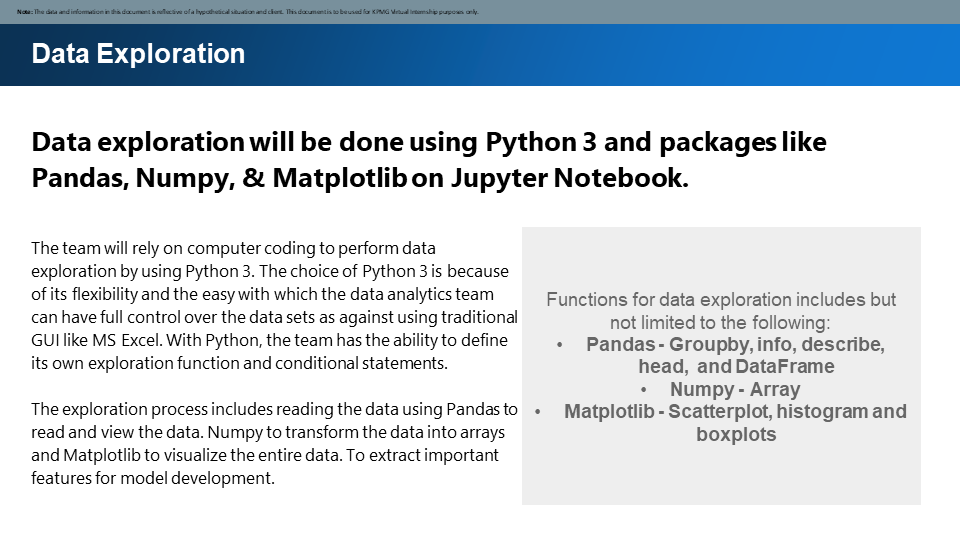
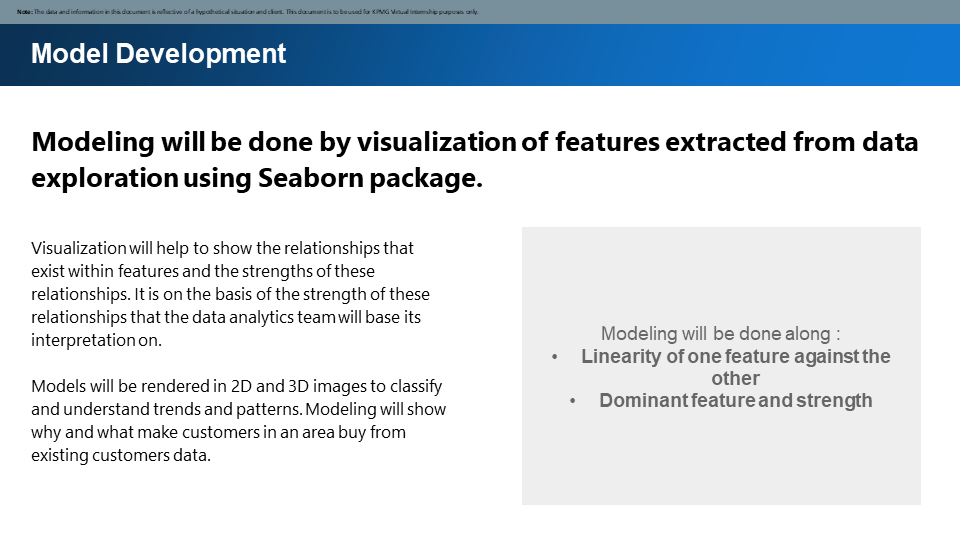
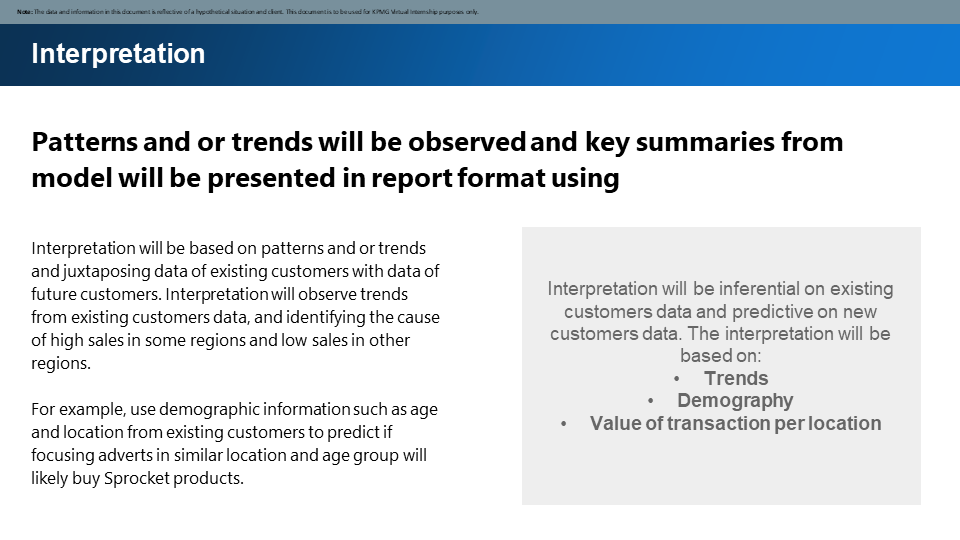
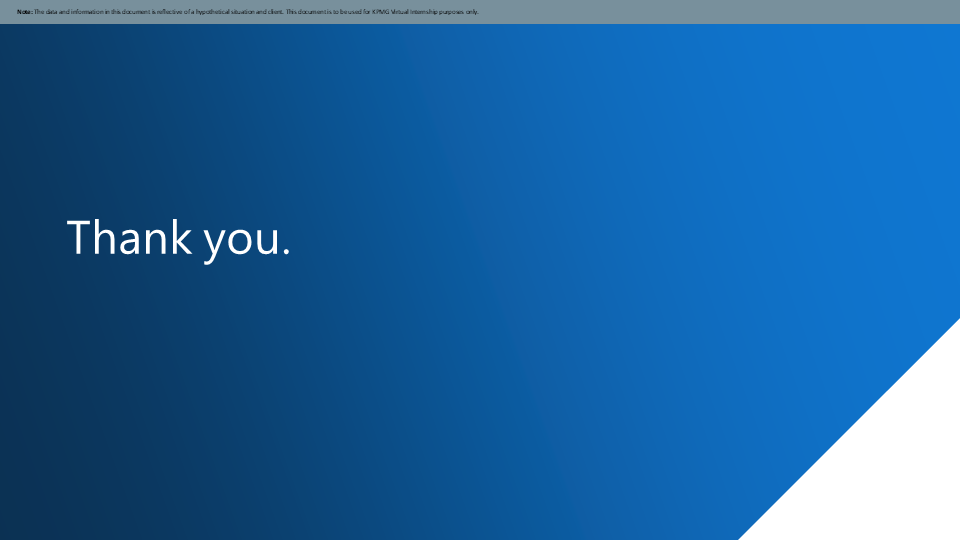

### Data Analysis and Interpretation

The next set of tasks is to display data summary and results of the analysis. 

Analysis will be based on the following:
It is important to keep in mind the business context when presenting your findings:

   1. What are the trends in the underlying data?
   2. Which customer segment has the highest customer value?
   3. What do you propose should be Sprocket Central Pty Ltd ’s marketing and growth strategy?
   4. What additional external datasets may be useful to obtain greater insights into customer preferences and propensity to purchase the products?
   
While InsideSherpa/KPMG has recommended the use of PowerBI and Tableau, I will be relying entirely on Matplotlib and Pandas libraries to do these activities. 

In the following cells, I will be performing data analysis and intepretation. 

In [13]:
#reading new customers data

NewCust = pd.read_excel("C:\\Users\Alaka\Downloads\KPMG_VI_New_raw_data_update_final.xlsx", "NewCustomerList")

In [14]:
NewCust.drop(["Unnamed: 16", "Unnamed: 17", "Unnamed: 18",
              "Unnamed: 19", "Unnamed: 20"], axis = 1, inplace = True)

NewCust.columns = ["first_name", "last_name", "gender","past_3_years_bike_related_purchases",
                   "DOB", "job_title", "job_industry_category", "wealth_segment",
                   "deceased_indicator", "owns_car", "tenure", "address", "postcode",
                   "state", "country", "property_valuation", "Rank", "Value"]

NewCust.drop(index = 0, inplace = True)

NewCust.head(3)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.71875


In [15]:
K = pd.DataFrame(SprocketTrans.customer_id.value_counts())
K.info

<bound method DataFrame.info of       customer_id
2476           14
1068           14
2183           14
2464           13
3232           13
2072           13
1140           13
1129           13
1302           13
1913           13
3326           13
1672           13
637            13
1946           13
2755           13
3048           13
377            13
2912           13
2548           13
1821           12
2036           12
1482           12
936            12
322            12
2309           12
255            12
1591           12
2240           12
1611           12
832            12
...           ...
1757            1
2477            1
2807            1
862             1
2145            1
872             1
3161            1
2423            1
1248            1
2209            1
71              1
898             1
3179            1
2417            1
2525            1
2352            1
2532            1
822             1
1203            1
278             1
1387            1
2749          

The importance of understanding the transaction history on the basis of customer_id helps to know the maximum number of transaction done by a prolifed customer. The maximum number of transaction a customer did is 14 transactions while some customers did not do any transaction. A profile will then be built to understand the transactions that happen at each region. The total number of customers is 3494. 

Three customers have 14 transactions history. I will briefly check their transactions to understand how valuable it is.

In [16]:
F = SprocketTrans.loc[SprocketTrans.customer_id==2476]
F.head(10)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
4351,4351,21,2476,2017-11-28 00:00:00,True,Approved,WeareA2B,Touring,medium,medium,1466.68,363.25,41701
6997,6997,0,2476,2017-04-22 00:00:00,False,Approved,OHM Cycles,Road,high,large,12.01,7.21,39880
7910,7910,90,2476,2017-10-28 00:00:00,True,Approved,Solex,Standard,low,medium,945.04,507.58,35052
8005,8005,0,2476,2017-11-17 00:00:00,False,Approved,WeareA2B,Standard,medium,small,175.89,131.92,37668
8373,8373,88,2476,2017-02-14 00:00:00,False,Approved,Norco Bicycles,Standard,high,small,1661.92,1479.11,34586
8935,8935,66,2476,2017-12-04 00:00:00,False,Approved,Solex,Standard,medium,medium,1163.89,589.27,42560
10882,10882,15,2476,2017-07-16 00:00:00,False,Approved,WeareA2B,Standard,medium,medium,1292.84,13.44,39915
11335,11335,69,2476,2017-07-05 00:00:00,True,Approved,Norco Bicycles,Road,medium,large,1240.31,795.1,40553
11865,11865,0,2476,2017-04-12 00:00:00,True,Approved,Norco Bicycles,Road,medium,medium,544.05,376.84,38647
12207,12207,80,2476,2017-12-16 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,1469.44,596.55,41047


In [17]:
SprocketTrans.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

To understand transactions by brand, I deploy Pandas crossby function.

In [18]:
import pandas as pd 
pd.crosstab(SprocketTrans.brand, SprocketTrans.online_order, margins = True)

online_order,False,True,All
brand,,,
Giant Bicycles,1604,1640,3244
Norco Bicycles,1446,1417,2863
OHM Cycles,1433,1560,2993
Solex,2122,2047,4169
Trek Bicycles,1471,1460,2931
WeareA2B,1630,1615,3245
All,9706,9739,19445


In [19]:
pd.crosstab(SprocketTrans.brand, SprocketTrans.product_line, margins = True)

product_line,Mountain,Road,Standard,Touring,All
brand,,,,,
Giant Bicycles,0,579,2554,179,3312
Norco Bicycles,200,923,1787,0,2910
OHM Cycles,0,779,2035,229,3043
Solex,0,537,3508,208,4253
Trek Bicycles,223,995,1772,0,2990
WeareA2B,0,157,2520,618,3295
All,423,3970,14176,1234,19803


In [20]:
pd.crosstab(SprocketTrans.brand, SprocketTrans.product_size, margins = True)

product_size,large,medium,small,All
brand,,,,
Giant Bicycles,949,1776,587,3312
Norco Bicycles,410,1736,764,2910
OHM Cycles,195,2648,200,3043
Solex,1091,2977,185,4253
Trek Bicycles,901,1542,547,2990
WeareA2B,430,2311,554,3295
All,3976,12990,2837,19803


In [21]:
pd.crosstab(SprocketTrans.brand, SprocketTrans.product_class, margins = True)

product_class,high,low,medium,All
brand,,,,
Giant Bicycles,785,196,2331,3312
Norco Bicycles,566,632,1712,2910
OHM Cycles,771,609,1663,3043
Solex,566,410,3277,4253
Trek Bicycles,325,786,1879,2990
WeareA2B,0,331,2964,3295
All,3013,2964,13826,19803


In [22]:
SprocketCustDem.replace({"F":"Female", "M":"Male", 
                         "U":"Male", "Femal":"Female", 
                         "MALE":"Male"}, inplace = True)

SprocketCustDem.drop(["default"], axis = 1, inplace = True)

SprocketCustDem.head(2)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
1,1,Laraine,Medendorp,Female,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11.0
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0


In [23]:
SprocketCustDem.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure'],
      dtype='object')

In [24]:
pd.crosstab(SprocketCustDem.gender, SprocketCustDem.job_industry_category, margins = True)

job_industry_category,Argiculture,Entertainment,Financial Services,Health,IT,Manufacturing,Property,Retail,Telecommunications,All
gender,,,,,,,,,,
Female,57,67,392,303,79,425,144,184,39,1690
Male,56,69,382,299,144,374,123,174,33,1654
All,113,136,774,602,223,799,267,358,72,3344


In [25]:
pd.crosstab(SprocketCustDem.gender, SprocketCustDem.wealth_segment, margins = True)

wealth_segment,Affluent Customer,High Net Worth,Mass Customer,All
gender,,,,
Female,481,514,1044,2039
Male,498,507,956,1961
All,979,1021,2000,4000


In [26]:
pd.crosstab(SprocketCustDem.gender, SprocketCustDem.owns_car, margins = True)

owns_car,No,Yes,All
gender,,,
Female,1012,1027,2039
Male,964,997,1961
All,1976,2024,4000


In [27]:
SprocketCustAdd.state.value_counts()

SprocketCustAdd.replace({"New South Wales": "NSW", 
                         "Victoria": "VIC"}, inplace = True)

SprocketCustAdd.state.value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

In [28]:
SprocketCustAdd.columns

Index(['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')

In [29]:
pd.crosstab(SprocketCustAdd.state, SprocketCustDem.gender, margins = True)

gender,Female,Male,All
state,,,
NSW,1101,1039,2140
QLD,418,420,838
VIC,520,501,1021
All,2039,1960,3999


In [30]:
pd.crosstab(SprocketCustAdd.state, SprocketTrans.customer_id, margins = True)

customer_id,1,2,5,6,7,8,9,15,16,17,...,3488,3489,3490,3491,3493,3496,3498,3499,3500,All
state,,,,,,,,,,,,,,,,,,,,,
NSW,2,0,3,0,0,1,1,0,0,1,...,0,0,2,0,0,0,0,2,1,2140
QLD,0,1,0,0,0,0,0,0,0,0,...,0,1,1,1,2,1,2,0,0,838
VIC,0,0,0,1,1,0,1,1,1,0,...,1,0,0,0,0,0,0,2,0,1021
All,2,1,3,1,1,1,2,1,1,1,...,1,1,3,1,2,1,2,4,1,3999


From the above, New South Wales (NSW) has more customers than any other region in the data.

In [31]:
# this is to check for the rows with gender labelled "U"
NewCust.gender.value_counts()

E = NewCust.loc[NewCust.gender == "U"]
E.count()

first_name                             17
last_name                              17
gender                                 17
past_3_years_bike_related_purchases    17
DOB                                     0
job_title                              16
job_industry_category                  17
wealth_segment                         17
deceased_indicator                     17
owns_car                               17
tenure                                 17
address                                17
postcode                               17
state                                  17
country                                17
property_valuation                     17
Rank                                   17
Value                                  17
dtype: int64

In [32]:
NewCust.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value'],
      dtype='object')

In [33]:
NewCust.replace({"U": "Female"}, inplace = True)

NewCust.gender.value_counts()

Female    530
Male      470
Name: gender, dtype: int64

In [34]:
pd.crosstab(NewCust.job_industry_category, NewCust.gender, margins = True)

gender,Female,Male,All
job_industry_category,,,
Argiculture,10,16,26
Entertainment,21,16,37
Financial Services,111,92,203
Health,81,71,152
IT,33,18,51
Manufacturing,97,102,199
Property,35,29,64
Retail,44,34,78
Telecommunications,13,12,25


In [35]:
pd.crosstab(NewCust.wealth_segment, NewCust.gender, margins = True)

gender,Female,Male,All
wealth_segment,,,
Affluent Customer,119,122,241
High Net Worth,138,113,251
Mass Customer,273,235,508
All,530,470,1000


In [36]:
pd.crosstab(NewCust.state, NewCust.gender, margins = True)

gender,Female,Male,All
state,,,
NSW,257,249,506
QLD,127,101,228
VIC,146,120,266
All,530,470,1000


The next stage of analysis to apply pandas groupby function to understand further the distribution in the data. Particularly the transaction data. 

In [37]:
Customers_Sale = SprocketTrans.groupby("customer_id")

Trans_By_CustID = pd.DataFrame(Customers_Sale.count())

With the above table, the transaction table can be merged with the customer demographic table and customer address table so, there is one unified table for analysis.  

In [38]:
CustData_TranHist = pd.merge(Trans_By_CustID, SprocketCustAdd, 
                              on = "customer_id", how = "left")

CustData_TranHist1 = pd.DataFrame(CustData_TranHist)

CustData_TranHist2 = pd.merge(CustData_TranHist1, SprocketCustDem, 
                              on = "customer_id", how = "left")


The new dataframe object for the analysis is a merged CustData_TranHist2. Then the next is to select part of the table that are useful for further analysis.

In [39]:
CustData_TranHist3 = CustData_TranHist2[['customer_id', 
                                        'transaction_id', 'product_id',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'state', 'gender','job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car']]

In [40]:
CustData_TranHist4 = pd.DataFrame(CustData_TranHist3)

In [41]:
X = CustData_TranHist4.state
Y = CustData_TranHist4.wealth_segment
pd.crosstab(X,Y, margins = True)

wealth_segment,Affluent Customer,High Net Worth,Mass Customer,All
state,,,,
NSW,452,480,934,1866
QLD,189,188,366,743
VIC,210,226,444,880
All,851,894,1744,3489


In [42]:
CustData_TranHist4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3494 entries, 0 to 3493
Data columns (total 17 columns):
customer_id              3494 non-null int64
transaction_id           3494 non-null int64
product_id               3494 non-null int64
online_order             3494 non-null int64
order_status             3494 non-null int64
brand                    3494 non-null int64
product_line             3494 non-null int64
product_class            3494 non-null int64
product_size             3494 non-null int64
list_price               3494 non-null int64
standard_cost            3494 non-null int64
state                    3489 non-null object
gender                   3493 non-null object
job_industry_category    2932 non-null object
wealth_segment           3493 non-null object
deceased_indicator       3493 non-null object
owns_car                 3493 non-null object
dtypes: int64(11), object(6)
memory usage: 491.3+ KB


In [43]:
CustData_TranHist4.replace({"NaN": "NSW"}, inplace = True)

In [44]:
#Gender here may not be necessary. This just shows that.

CustData_TranHist4.gender.replace({"Male": 1,
                                   "Female":2}, inplace = True)

In [45]:
Customer_state = CustData_TranHist4.groupby("state")
Customer_Vic = pd.DataFrame(Customer_state.get_group("VIC").sum())
Customer_NSW = pd.DataFrame(Customer_state.get_group("NSW").sum())
Customer_QLD = pd.DataFrame(Customer_state.get_group("QLD").sum())

In [46]:
# This transaction analysis when combines customer demographic and address data
Trans_Analysis = pd.concat([Customer_Vic, Customer_NSW, Customer_QLD], axis = 1)

Trans_Analysis.columns = ["VIC", "NSW", "QLD"]

In [47]:
Trans_Analysis.columns

Index(['VIC', 'NSW', 'QLD'], dtype='object')

In [48]:
Trans_Analysis.drop(["customer_id", "state",
                   "gender", "wealth_segment", "deceased_indicator",
                   "owns_car"], inplace = True)

In [49]:
Trans_Analysis

,VIC,NSW,QLD
transaction_id,5021,10685,4262
product_id,5021,10685,4262
online_order,4940,10485,4184
order_status,5021,10685,4262
brand,4988,10563,4222
product_line,4988,10563,4222
product_class,4988,10563,4222
product_size,4988,10563,4222
list_price,5021,10685,4262
standard_cost,4988,10563,4222


In [50]:
 CustData_TranHist4.head(2)

,customer_id,transaction_id,product_id,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,state,gender,job_industry_category,wealth_segment,deceased_indicator,owns_car
0,1,11,11,11,11,11,11,11,11,11,11,NSW,2.0,Health,Mass Customer,N,Yes
1,2,3,3,3,3,3,3,3,3,3,3,NSW,1.0,Financial Services,Mass Customer,N,Yes


In [51]:
# For high value customers with transactions ID greater than or equals to 10.

High_ValueCust = CustData_TranHist4.loc[CustData_TranHist4.transaction_id >= 10]
High_ValueCust.head(5)

,customer_id,transaction_id,product_id,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,state,gender,job_industry_category,wealth_segment,deceased_indicator,owns_car
0,1,11,11,11,11,11,11,11,11,11,11,NSW,2.0,Health,Mass Customer,N,Yes
7,8,10,10,9,10,10,10,10,10,10,10,NSW,1.0,NaN,Mass Customer,N,No
24,25,12,12,12,12,12,12,12,12,12,12,QLD,1.0,Financial Services,Mass Customer,N,Yes
38,39,12,12,12,12,12,12,12,12,12,12,NSW,1.0,Entertainment,Mass Customer,N,No
79,80,10,10,10,10,10,10,10,10,10,10,VIC,1.0,Entertainment,Mass Customer,N,No


### Recommendation

From the transaction analysis where customers demographic and address data were combined, it is clear that Sprocket recorded more sales from New South Wales state than other states in Australia. However, the performance of the other state are significantly high. Therefore, marketing efforts should not focus just one states as other states have potentials for recording higher volumes if residents are given opportunity to learn more about Sprocket products. 

Comparing the transaction analysis with the new customers data as in cell "57" above, there are more potentials new customers from New South Wales state also. While further analysis may be done to show what kind of brand sells best in a state, active marketing should be done in all the states to continue to boost sales irrespective of the customer's wealth segment, work industry or gender. 

### Important chart for visualization.

Text(0.5,1,'Transaction Analysis by State')

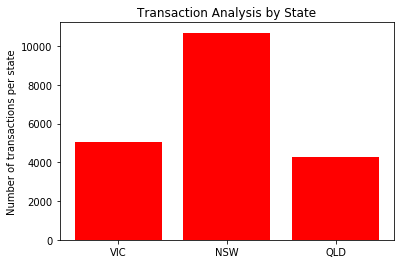

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

objects = ('VIC', 'NSW', 'QLD')
y_pos = np.arange(len(objects))
values = [5021,10685,4262]

plt.bar(y_pos, values, align='center', alpha=1, color = "red")
plt.xticks(y_pos, objects)
plt.ylabel('Number of transactions per state')
plt.title('Transaction Analysis by State')